# **VIDEO GAMES SALES DATA ANALYSIS**

## **Table of content**


* [I. Import librabries](#c1)
* [II. Read dataset](#c2)
* [III. Dataset overview](#c3)
* [IV. Handle missing/duplicated data](#c4)
* [V. Data exploration](#c5)
    * [1. Total sale per region](#c51)
    * [2. Top 10 platform with the most sale](#c52)
    * [3. Top 10 publisher with the most sale](#c53)

## **I. Import librabries** <a class="anchor" id="c1"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **II. Read dataset** <a class="anchor" id="c2"></a>

In [2]:
# Read dataset
df = pd.read_csv("../data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,Region,Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,North America,41.49
1,1,Wii Sports,Wii,2006,Sports,Nintendo,Europe,29.02
2,1,Wii Sports,Wii,2006,Sports,Nintendo,Japan,3.77
3,1,Wii Sports,Wii,2006,Sports,Nintendo,Other,8.46
4,1,Wii Sports,Wii,2006,Sports,Nintendo,Global,82.74


## **III. Dataset overview** <a class="anchor" id="c3"></a>

| Index | Variable            | Description                                  |
|-------|---------------------|----------------------------------------------|
| 1     | Rank                | Ranking of overall sales     |
| 2     | Name                | The games name     |
| 3     | Platform            | Platform of the games release (i.e. PC,PS4, etc.)     |
| 4     | Year                | Year of the game's release     |
| 5     | Genre               | Genre of the game     |
| 6     | Publisher           | Publisher of the game     |
| 7     | Region              | Region where the video games are sold     |
| 8     | Sales               | the number of sales in that region (in millions)     |

In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81870 entries, 0 to 81869
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       81870 non-null  int64  
 1   Name       81870 non-null  object 
 2   Platform   81870 non-null  object 
 3   Year       81870 non-null  int64  
 4   Genre      81870 non-null  object 
 5   Publisher  81870 non-null  object 
 6   Region     81870 non-null  object 
 7   Sales      81870 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 5.0+ MB


In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81870 entries, 0 to 81869
Columns: 8 entries, Rank to Sales
dtypes: float64(1), int64(2), object(5)
memory usage: 5.0+ MB


### **Inferences**
 * **Entries**: This dataset contains 81870 entries
 * **Columns**: This dataset has 8 columns
 * **Data types**:
    * Most columns (5 to be precise) are of the **object** data type, representing strings or categorical data
    * 2 columns are of the **int64** data type which represents integer values
    * 1 column is of the **float64** data type, representing decimal values

In [5]:
# Based on the previous dataset description, we divide the dataset into numeric list and category list
num_list = list(df.dtypes[df.dtypes != 'object'].index)
cate_list = list(df.dtypes[df.dtypes == 'object'].index)

print(num_list)
print(cate_list)

['Rank', 'Year', 'Sales']
['Name', 'Platform', 'Genre', 'Publisher', 'Region']


In [6]:
# Get the summary statistic for numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,81870.0,8286.495664,4797.892321,1.0,4122.0,8287.50,12443.00,16600.00
Year,81870.0,2006.398864,5.841379,1977.0,2003.0,2007.00,2010.00,2020.00
Sales,81870.0,0.216658,0.857467,0.0,0.0,0.03,0.15,82.74


### **Numerical Values**:
 * `Rank`: The rank of overall sales
 * `Year`: The year when the video game is released
 * `Sales`: Sale value from each region from 0 (or <10000) to 82.74 million copies sold

In [7]:
# Get the summary statistic for categorical values
df.describe(include='object').T

,count,unique,top,freq
Name,81870,11385,Need for Speed: Most Wanted,60
Platform,81870,31,DS,10690
Genre,81870,12,Action,16340
Publisher,81870,580,Electronic Arts,6730
Region,81870,5,North America,16374


### **Categorical Values**:
 * `Name`: The name of the video game with upto 11385 unique values, duplicated value could be because that same game got released on multiple different platform
 * `Platform`: The platform from which the game got released on with 31 unique platform, as for this dataset, `DS` is the most popular platform
 * `Genre`: The genre of the game with 12 unique values, `Action` is most 
 * `Publisher`: The publisher who release the game with 580 differnet publishers, `Electronic Arts` is the publisher who release the most games.
 * `Region`: The region where the video game was sold, with 5 unique values

## **IV. Handle missing/duplicated data** <a class="anchor" id="c4"></a>

In [8]:
# Calculate the missing rate of the dataset
missing_value_percentage = (df.isnull().sum() / len(df)) * 100
missing_value_percentage[missing_value_percentage > 0]

Series([], dtype: float64)

In [9]:
# Handle duplicated data (if any)
df.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,Region,Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,North America,41.49
1,1,Wii Sports,Wii,2006,Sports,Nintendo,Europe,29.02
2,1,Wii Sports,Wii,2006,Sports,Nintendo,Japan,3.77
3,1,Wii Sports,Wii,2006,Sports,Nintendo,Other,8.46
4,1,Wii Sports,Wii,2006,Sports,Nintendo,Global,82.74
...,...,...,...,...,...,...,...,...
81865,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,North America,0.01
81866,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,Europe,0.00
81867,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,Japan,0.00
81868,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,Other,0.00


## **V. Data exploration** <a class="anchor" id="c5"></a>

### **1. Total sale per region** <a class="anchor" id="c51"></a>

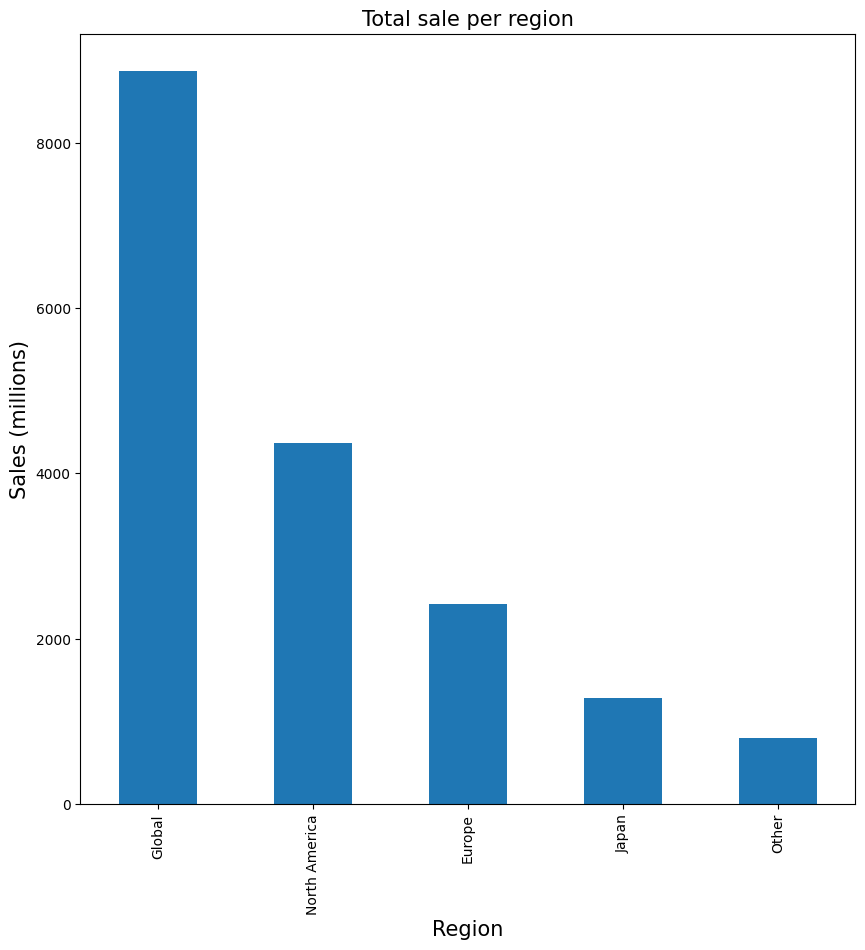

In [10]:
region_data = df.groupby("Region")["Sales"].sum()

# Sort by Sales in descending order
region_data = region_data.sort_values(ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
region_data.plot(kind='bar', ax=ax)
ax.set_title("Total sale per region", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel("Region", fontsize=15)
ax.set_ylabel("Sales (millions)", fontsize=15)

plt.show()

### **2. Top 10 platform with the most sale** <a class="anchor" id="c52"></a>

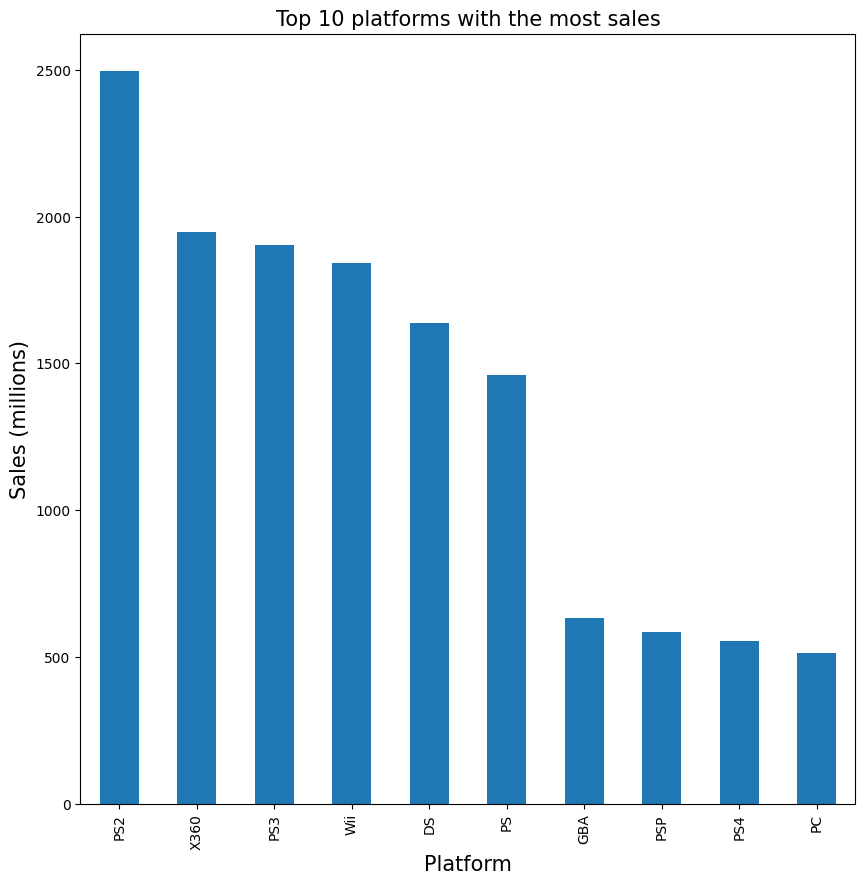

In [11]:
platform_data = df.groupby("Platform")["Sales"].sum()

# Sort by Sales in descending order and select the top 10
platform_data = platform_data.sort_values(ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
platform_data.plot(kind='bar', ax=ax)
ax.set_title("Top 10 platforms with the most sales", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel("Platform", fontsize=15)
ax.set_ylabel("Sales (millions)", fontsize=15)

plt.show()

### **3. Top 10 publishers with the most sale** <a class="anchor" id="c53"></a>

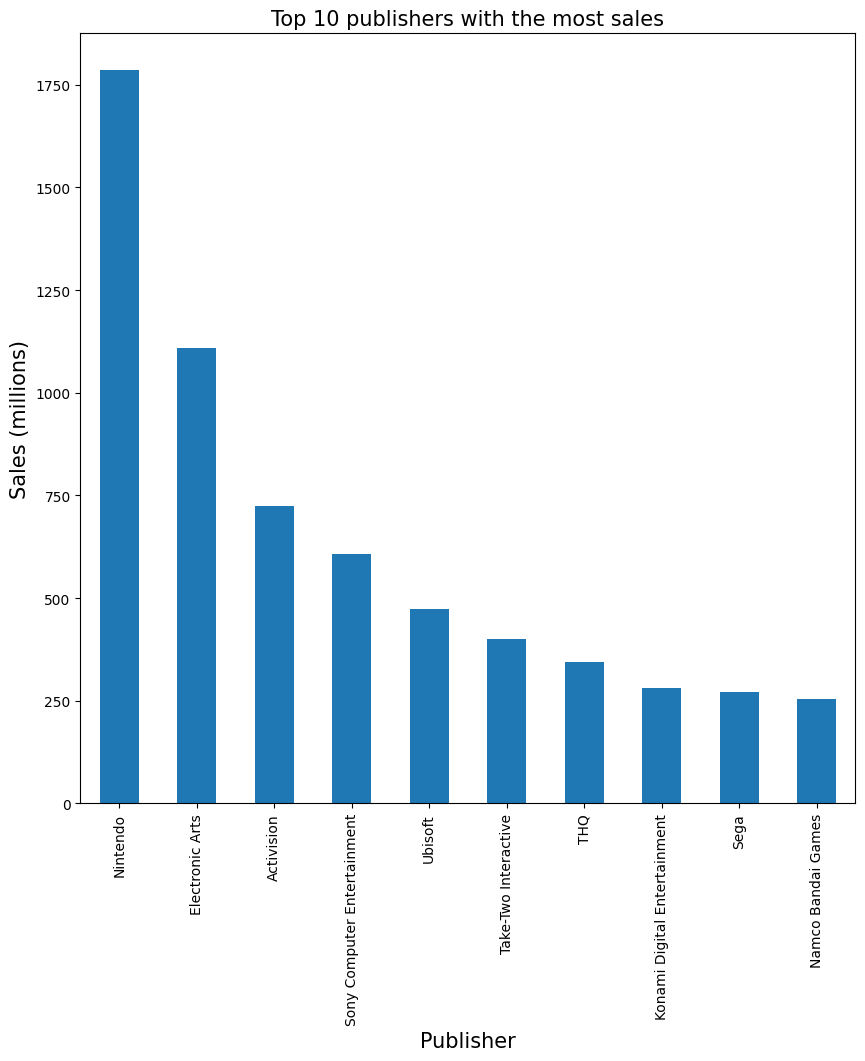

In [15]:
publisher_data = df[df["Region"] == "Global"].groupby("Publisher")["Sales"].sum()

# Sort by Sales in descending order and select the top 10
publisher_data = publisher_data.sort_values(ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
publisher_data.plot(kind='bar', ax=ax)
ax.set_title("Top 10 publishers with the most sales", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel("Publisher", fontsize=15)
ax.set_ylabel("Sales (millions)", fontsize=15)

plt.show()

### **4. Top 10 games with the most sale globally** <a class="anchor" id="c54"></a>

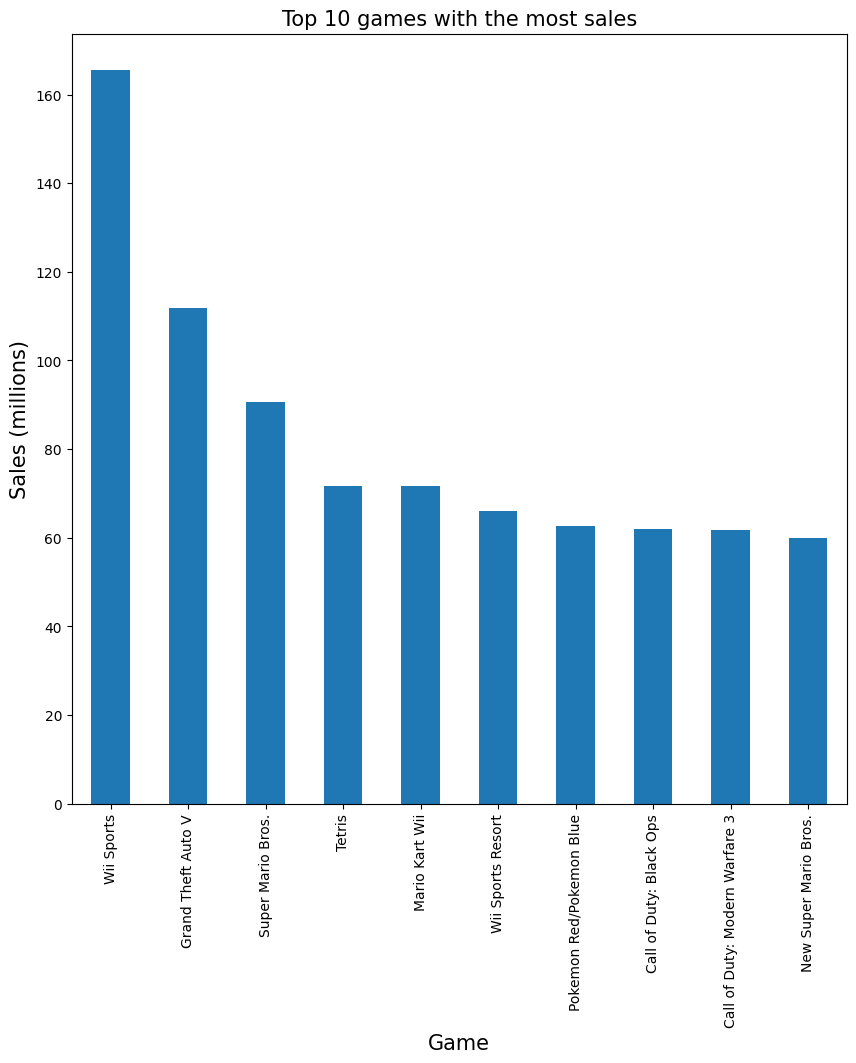

In [ ]:
videogame_data = df[df["Region"] == "Global"].groupby("Name")["Sales"].sum()

# Sort by Sales in descending order and select the top 10
videogame_data = videogame_data.sort_values(ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
videogame_data.plot(kind='bar', ax=ax)
ax.set_title("Top 10 games with the most sales", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel("Game", fontsize=15)
ax.set_ylabel("Sales (millions)", fontsize=15)

plt.show()